In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

### **Affichage du Dataset**

In [ ]:
df_boston = pd.read_csv('HousingData.csv')
df_boston = df_boston.dropna() # enlever les individus possèdant une variable NULL
print(df_boston)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
5    0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
499  0.17783   0.0   9.69   0.0  0.585  5.569  73.5  2.3999    6  391   
500  0.22438   0.0   9.69   0.0  0.585  6.027  79.7  2.4982    6  391   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

### **Description des variables**

In [ ]:


# Obtenir les statistiques descriptives
summary = df_boston.describe()

# Transposer les statistiques descriptives pour les afficher verticalement
summary = summary.transpose()

# Ajouter une colonne pour la variance
summary['variance'] = df_boston.var()

# Ajouter une colonne pour la valeur manquante
summary['missing'] = df_boston.isnull().sum()

# Renommer la colonne '50%' en 'median'
summary = summary.rename(columns={'50%': 'median'})

# Afficher les statistiques descriptives
print(summary)

         count        mean         std        min         25%     median  \
CRIM     394.0    3.690136    9.202423    0.00632    0.081955    0.26888   
ZN       394.0   11.460660   23.954082    0.00000    0.000000    0.00000   
INDUS    394.0   11.000863    6.908364    0.46000    5.130000    8.56000   
CHAS     394.0    0.068528    0.252971    0.00000    0.000000    0.00000   
NOX      394.0    0.553215    0.113112    0.38900    0.453000    0.53800   
RM       394.0    6.280015    0.697985    3.56100    5.879250    6.20150   
AGE      394.0   68.932741   27.888705    2.90000   45.475000   77.70000   
DIS      394.0    3.805268    2.098571    1.12960    2.110100    3.19920   
RAD      394.0    9.403553    8.633451    1.00000    4.000000    5.00000   
TAX      394.0  406.431472  168.312419  187.00000  280.250000  330.00000   
PTRATIO  394.0   18.537563    2.166460   12.60000   17.400000   19.10000   
B        394.0  358.490939   89.283295    2.60000  376.707500  392.19000   
LSTAT    394

#Matrice de corrélation

In [ ]:
corr_matrix = df_boston.corr()

# Afficher la matrice de corrélation
print(corr_matrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.188075  0.391552 -0.051970  0.416160 -0.227170  0.341311   
ZN      -0.188075  1.000000 -0.521256 -0.033357 -0.515660  0.343210 -0.568174   
INDUS    0.391552 -0.521256  1.000000  0.049820  0.762737 -0.403068  0.642387   
CHAS    -0.051970 -0.033357  0.049820  1.000000  0.076661  0.095308  0.072644   
NOX      0.416160 -0.515660  0.762737  0.076661  1.000000 -0.316563  0.732540   
RM      -0.227170  0.343210 -0.403068  0.095308 -0.316563  1.000000 -0.248670   
AGE      0.341311 -0.568174  0.642387  0.072644  0.732540 -0.248670  1.000000   
DIS     -0.365052  0.645359 -0.696569 -0.095037 -0.768137  0.218713 -0.753547   
RAD      0.608667 -0.298773  0.591944  0.014102  0.628170 -0.236057  0.443585   
TAX      0.560841 -0.305768  0.734204 -0.026513  0.679824 -0.320561  0.504472   
PTRATIO  0.265428 -0.422164  0.395691 -0.104995  0.210216 -0.390686  0.264968   
B       -0.386254  0.169894 

### **Définition des input et des Output**

In [ ]:
# Séparer les variables indépendantes et la variable dépendante
boston_output = df_boston['MEDV']
df_boston.drop('MEDV', axis=1, inplace=True)
boston_input = df_boston


# **Regréssion linéaire simple**



In [ ]:
model = smf.ols('boston_output ~ boston_input',data= df_boston).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          boston_output   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     96.29
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          1.75e-111
Time:                        21:15:54   Log-Likelihood:                -1143.4
No. Observations:                 394   AIC:                             2315.
Df Residuals:                     380   BIC:                             2370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           32.6801      5.681      5.752      0.000      21.509      43.851
boston_input[0]     -0.0976      0.032     -3.007      0.003      -0.161      -0.034
boston_input[1]      0.0489      0.014      3.397      0.001       0.021       0.077
boston_input[2]      0.0304      0.066      0.461      0.645      -0.099       0.160
boston_input[3]      2.7694      0.925      2.993      0.003       0.950       4.588
boston_input[4]    -17.9690      4.243     -4.235      0.000     -26.311      -9.627
boston_input[5]      4.2833      0.471      9.100      0.000       3.358       5.209
boston_input[6]     -0.0130      0.014     -0.898      0.370      -0.041       0.015
boston_input[7]     -1.4585      0.211     -6.912      0.000      -1.873      -1.044
boston_input[8]      0.2859      0.069      4.125      0.000       0.150       0.422
boston_input[9]     -0.0131      0.004     -3.324      0.001      -0.021      -0.005
boston_input[10]    -0.9146      0.141     -6.506      0.000      -1.191      -0.638
boston_input[11]     0.0097      0.003      3.251      0.001       0.004       0.015
boston_input[12]    -0.4237      0.055     -7.700      0.000      -0.532      -0.315
==============================================================================
Omnibus:                      161.243   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.814
Skew:                           1.657   Prob(JB):                    3.33e-197
Kurtosis:                       9.643   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##**Calcul du MSE et RMSE**


In [ ]:
y_pred = model.predict(boston_input)
mse = mean_squared_error(boston_output, y_pred)
r2 = r2_score(boston_output, y_pred)

print("MSE:", mse)
print("RMSE",math.sqrt(mse))
print("R²:", r2)

MSE: 19.41839793073491
RMSE 4.406631131684941
R²: 0.767114948467778


In [ ]:
X_ENL = df_boston
X_ENL.drop('AGE', axis=1, inplace=True)
X_ENL.drop('INDUS', axis=1, inplace=True)
X_ENL

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,0.0,0.458,6.430,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,0.0,0.585,5.569,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,0.0,0.585,6.027,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1,273,21.0,396.90,5.64


# **Regréssion linéaire en enlevant les variables à effet non linéaire**

In [ ]:
model = smf.ols('boston_output ~ X_ENL',data= df_boston).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          boston_output   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     114.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          2.51e-113
Time:                        21:16:39   Log-Likelihood:                -1143.9
No. Observations:                 394   AIC:                             2312.
Df Residuals:                     382   BIC:                             2360.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9751      5.631      5.856      0.000      21.904      44.046
X_ENL[0]      -0.0982      0.032     -3.029      0.003      -0.162      -0.034
X_ENL[1]       0.0500      0.014      3.526      0.000       0.022       0.078
X_ENL[2]       2.7881      0.920      3.031      0.003       0.980       4.596
X_ENL[3]     -18.4678      3.895     -4.741      0.000     -26.127     -10.809
X_ENL[4]       4.1670      0.455      9.149      0.000       3.271       5.063
X_ENL[5]      -1.4206      0.197     -7.201      0.000      -1.808      -1.033
X_ENL[6]       0.2823      0.066      4.309      0.000       0.153       0.411
X_ENL[7]      -0.0124      0.003     -3.573      0.000      -0.019      -0.006
X_ENL[8]      -0.9148      0.139     -6.599      0.000      -1.187      -0.642
X_ENL[9]       0.0095      0.003      3.201      0.001       0.004       0.015
X_ENL[10]     -0.4400      0.052     -8.532      0.000      -0.541      -0.339
==============================================================================
Omnibus:                      157.148   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.847
Skew:                           1.624   Prob(JB):                    5.77e-184
Kurtosis:                       9.391   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred = model.predict(X_ENL)
mse = mean_squared_error(boston_output, y_pred)
r2 = r2_score(boston_output, y_pred)

print("MSE:", mse)
print("RMSE",math.sqrt(mse))
print("R²:", r2)

MSE: 19.469661337814802
RMSE 4.412443918942744
R²: 0.7665001458850879


# Régression linéaire sur les composantes principales d'une ACP

##**Normaliser les données**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
df_boston_PCA = pd.read_csv('HousingData.csv')
df_boston_PCA = df_boston_PCA.dropna() # enlever les individus possèdant une variable NULL
scale = StandardScaler().fit_transform(df_boston_PCA)
columns_val = ['CRIM ','ZN','IND','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df_boston_PCA = pd.DataFrame(data = scale,columns = columns_val)
df_boston_PCA

,CRIM,ZN,IND,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126,0.179640
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196,-0.083191
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278,1.351424
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610,1.209058
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615,0.694349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-0.382157,-0.479051,-0.189991,-0.271237,0.281356,-1.019964,0.163976,-0.670530,-0.394730,-0.091800,0.306158,0.418068,0.319337,-0.532192
390,-0.377092,-0.479051,-0.189991,-0.271237,0.281356,-0.362955,0.386570,-0.623629,-0.394730,-0.091800,0.306158,0.430740,0.213845,-0.608851
391,-0.396580,-0.479051,0.134666,-0.271237,0.175132,-0.229545,0.278863,-0.724158,-0.974609,-0.793769,1.138063,0.430740,-0.505417,-0.192703
392,-0.394895,-0.479051,0.134666,-0.271237,0.175132,0.998402,0.792268,-0.781413,-0.974609,-0.793769,1.138063,0.430740,-0.976704,0.168688


In [ ]:
pca = PCA()
pca.fit(df_boston_PCA)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
components = pca.transform(df_boston_PCA)

[6.62639052 1.61947583 1.35096486 0.89839442 0.82519891 0.66650946
 0.55802168 0.3872751  0.28656904 0.23947541 0.20339882 0.17856682
 0.13340904 0.06197351]
[0.4721123  0.11538325 0.09625257 0.06400816 0.05879318 0.04748699
 0.03975753 0.0275923  0.02041726 0.01706197 0.01449161 0.0127224
 0.00950503 0.00441544]


#**Composantes principales**

In [ ]:
df_CPR = pd.DataFrame(data = components)
df_CPR

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-2.075258,0.504767,-0.283852,-0.707522,0.784169,-0.262331,0.301679,0.225951,-0.467597,-0.472942,0.581007,-0.039350,-0.537787,0.258895
1,-1.367158,-0.212563,-0.959255,-0.501972,0.049020,0.300772,0.511026,-0.236949,-0.164219,-0.482093,-0.006375,0.533206,-0.109926,-0.126438
2,-2.401694,0.859918,-0.230305,-0.809961,-0.770321,0.476235,0.477564,0.137278,0.059076,-0.219916,-0.227145,0.330710,0.361295,0.072321
3,-2.850810,0.117816,-0.084822,-0.478162,-1.038473,0.696111,0.610975,0.304695,-0.359375,-0.252636,0.080951,0.111285,0.525797,0.149989
4,-2.298039,-0.405239,-0.520825,-0.317174,-0.580512,0.576498,0.624553,0.166443,-0.466754,-0.180388,0.346126,0.420256,0.406208,0.080993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.604068,-0.568277,-1.267962,-0.192873,0.116691,-0.203384,0.007841,0.167039,-0.168394,0.338753,0.383361,-0.300609,-0.263693,0.182915
390,0.503051,-0.244312,-1.107706,-0.361068,-0.066510,-0.106852,0.062608,-0.189660,-0.168771,-0.021378,0.255602,-0.340001,-0.362876,0.152071
391,-0.028402,-0.165991,-1.485203,-0.506250,-0.751275,0.365237,0.211158,-0.169618,0.786811,0.089918,0.666609,-0.419844,-0.088004,-0.007286
392,-0.370878,0.788342,-1.137759,-0.936231,-1.256994,0.544378,0.322949,-0.732731,0.863960,-0.299994,0.608651,-0.323420,-0.163180,-0.015212


In [ ]:
pca_output = df_CPR[13]
df_CPR.drop(13, axis=1, inplace=True)
model = smf.ols('pca_output ~ df_CPR',data= df_boston_PCA).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pca_output   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                 4.264e-15
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               1.00
Time:                        21:28:04   Log-Likelihood:                -10.695
No. Observations:                 394   AIC:                             49.39
Df Residuals:                     380   BIC:                             105.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.935e-17      0.013   4.65e-15      1.000      -0.025       0.025
df_CPR[0]  -7.601e-17      0.005  -1.53e-14      1.000      -0.010       0.010
df_CPR[1]  -9.695e-17      0.010  -9.66e-15      1.000      -0.020       0.020
df_CPR[2]  -1.636e-16      0.011  -1.49e-14      1.000      -0.022       0.022
df_CPR[3]   2.061e-16      0.013   1.53e-14      1.000      -0.026       0.026
df_CPR[4]  -2.707e-16      0.014  -1.93e-14      1.000      -0.028       0.028
df_CPR[5]   1.943e-16      0.016   1.24e-14      1.000      -0.031       0.031
df_CPR[6]   3.149e-16      0.017   1.84e-14      1.000      -0.034       0.034
df_CPR[7]   2.811e-16      0.021   1.37e-14      1.000      -0.040       0.040
df_CPR[8]  -9.604e-16      0.024  -4.03e-14      1.000      -0.047       0.047
df_CPR[9]  -1.359e-16      0.026  -5.21e-15      1.000      -0.051       0.051
df_CPR[10] -7.438e-17      0.028  -2.63e-15      1.000      -0.056       0.056
df_CPR[11] -2.491e-16      0.030  -8.24e-15      1.000      -0.059       0.059
df_CPR[12]   3.27e-16      0.035   9.35e-15      1.000      -0.069       0.069
==============================================================================
Omnibus:                       48.754   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.193
Skew:                           0.307   Prob(JB):                     5.79e-59
Kurtosis:                       6.995   Cond. No.                         7.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = model.predict(df_CPR)
mse = mean_squared_error(pca_output, y_pred)
r2 = r2_score(pca_output, y_pred)

print("MSE:", mse)
print("RMSE",math.sqrt(mse))
print("R²:", r2)

MSE: 0.06181621857342855
RMSE 0.24862867608831557
R²: 0.0


# **Regréssion linéaire en utilisant Ridge**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [ ]:
df_Ridge = pd.read_csv('HousingData.csv')
df_Ridge = df_Ridge.dropna() # enlever les individus possèdant une variable NULL

In [ ]:
X = df_Ridge.drop('MEDV', axis=1)
y = df_Ridge['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [ ]:
score = ridge.score(X_test_scaled, y_test)
print("R² sur l'ensemble de test : {:.3f}".format(score))

R² sur l'ensemble de test : 0.691


In [ ]:
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE",math.sqrt(mse))

MSE: 28.870627632433145
RMSE 5.3731394577502956


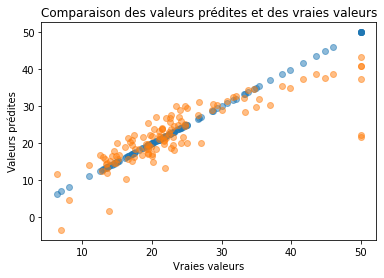

In [ ]:
import matplotlib.pyplot as plt

# Tracer le nuage de points avec les vraies valeurs
plt.scatter(y_test, y_test, alpha=0.5)

# Tracer les valeurs prédites
plt.scatter(y_test, y_pred, alpha=0.5)

# Ajouter un titre et des labels d'axes
plt.title('Comparaison des valeurs prédites et des vraies valeurs')
plt.xlabel('Vraies valeurs')
plt.ylabel('Valeurs prédites')

# Afficher le graphique
plt.show()

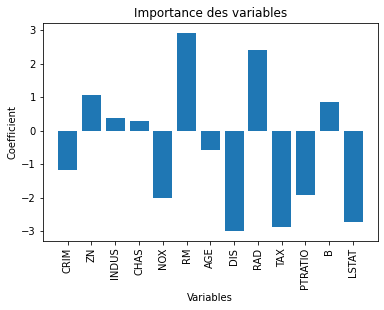

In [ ]:
import numpy as np

# Obtenir les noms des variables
var_names = X.columns

# Obtenir les coefficients
coef = ridge.coef_

# Tracer les coefficients
plt.bar(np.arange(len(var_names)), coef)

# Ajouter les noms des variables sur l'axe des x
plt.xticks(np.arange(len(var_names)), var_names, rotation=90)

# Ajouter un titre et des labels d'axes
plt.title('Importance des variables')
plt.xlabel('Variables')
plt.ylabel('Coefficient')

# Afficher le graphique
plt.show()


# **Regréssion linéaire avec Lasso**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
df_Lasso = pd.read_csv('HousingData.csv')
df_Lasso = df_Lasso.dropna() # enlever les individus possèdant une variable NULL

In [ ]:
X = df_Lasso.drop('MEDV', axis=1)
y = df_Lasso['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [ ]:
score = lasso.score(X_test_scaled, y_test)
print("R² sur l'ensemble de test : {:.3f}".format(score))

y_pred = lasso.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
print("RMSE",math.sqrt(mse))


R² sur l'ensemble de test : 0.680
MSE: 29.871665042058556
RMSE 5.465497693902958


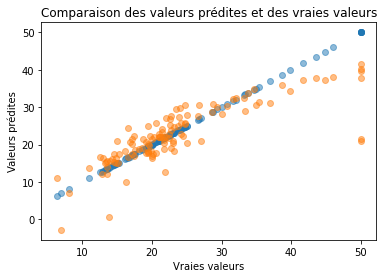

In [ ]:
import matplotlib.pyplot as plt

# Tracer le nuage de points avec les vraies valeurs
plt.scatter(y_test, y_test, alpha=0.5)

# Tracer les valeurs prédites
plt.scatter(y_test, y_pred, alpha=0.5)

# Ajouter un titre et des labels d'axes
plt.title('Comparaison des valeurs prédites et des vraies valeurs')
plt.xlabel('Vraies valeurs')
plt.ylabel('Valeurs prédites')

# Afficher le graphique
plt.show()

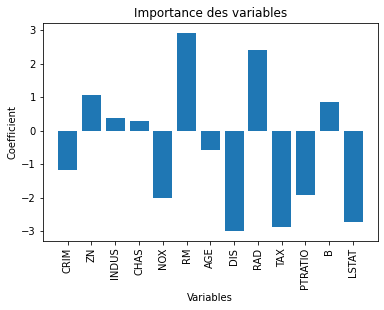

In [ ]:
import numpy as np

# Obtenir les noms des variables
var_names = X.columns

# Obtenir les coefficients
coef = ridge.coef_

# Tracer les coefficients
plt.bar(np.arange(len(var_names)), coef)

# Ajouter les noms des variables sur l'axe des x
plt.xticks(np.arange(len(var_names)), var_names, rotation=90)

# Ajouter un titre et des labels d'axes
plt.title('Importance des variables')
plt.xlabel('Variables')
plt.ylabel('Coefficient')

# Afficher le graphique
plt.show()
